In [7]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [11]:
split_ratio=0.7
train_index=int(mnist.data.shape[0]*split_ratio)
X_train=mnist.data[:train_index]
X_test=mnist.data[train_index:]

y_train=mnist.target[:train_index]
y_test=mnist.target[train_index:]

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(49000, 784) (21000, 784) (49000,) (21000,)


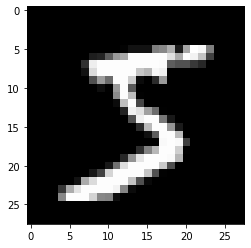

In [15]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0].reshape(-1,28),'gray')

##randomforest 단일 모형

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [19]:
clf.score(X_test,y_test)

0.9695714285714285

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2056,    0,    5,    1,    0,    2,    4,    1,    7,    2],
       [   0, 2281,    7,    5,    2,    2,    4,    0,    4,    2],
       [   9,    0, 2054,    8,    7,    1,    6,   17,   17,    4],
       [   3,    0,   16, 2072,    0,   23,    3,   14,   18,    6],
       [   1,    5,    5,    0, 1996,    0,    5,    1,    3,   35],
       [   7,    0,    8,   28,    4, 1819,   18,    3,   12,    8],
       [  10,    3,    1,    0,    4,    8, 1991,    0,    4,    0],
       [   1,    9,   29,    6,    5,    0,    0, 2147,    2,   18],
       [   8,    6,   10,   13,    8,   12,   10,    8, 1984,   15],
       [  10,    9,    5,   23,   25,    8,    2,   12,   12, 1961]])

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,list(range(1,10))))

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


              precision    recall  f1-score   support

           1       0.99      0.99      0.99      2307
           2       0.96      0.97      0.96      2123
           3       0.96      0.96      0.96      2155
           4       0.97      0.97      0.97      2051
           5       0.97      0.95      0.96      1907
           6       0.97      0.99      0.98      2021
           7       0.97      0.97      0.97      2217
           8       0.96      0.96      0.96      2074
           9       0.96      0.95      0.95      2067

   micro avg       0.97      0.97      0.97     18922
   macro avg       0.97      0.97      0.97     18922
weighted avg       0.97      0.97      0.97     18922



##Ensemble 모델

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.ensemble import VotingClassifier

rf_clf=RandomForestClassifier()
ex_clf=ExtraTreesClassifier()
sv_clf=svm.SVC()

voting_clf=VotingClassifier(estimators=[('random_forest',rf_clf),('extra_trees',ex_clf),('svm',sv_clf)],voting='hard')
voting_clf.fit(X_train,y_train)

AttributeError: ignored

In [33]:
y_test=voting_clf.predict(X_test)

In [34]:
clf.score(X_test,y_test)

0.9856190476190476

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2087,    0,    2,    2,    1,    2,    1,    0,    3,    1],
       [   0, 2304,    0,    0,    1,    0,    1,    3,    4,    0],
       [   4,    0, 2108,    8,    5,    1,    7,    7,    7,    2],
       [   3,    1,    8, 2109,    1,   18,    1,    4,   14,    3],
       [   0,    1,    3,    0, 2021,    1,    2,    2,    0,   14],
       [   5,    0,    3,   17,    1, 1841,    6,    2,    5,    1],
       [   4,    0,    4,    0,    2,    3, 2017,    0,    4,    0],
       [   0,    3,    4,    2,    2,    0,    0, 2176,    1,    9],
       [   0,    3,    8,   10,    4,    8,    7,    3, 2019,    5],
       [   2,    1,    0,    8,   13,    1,    1,    6,    6, 2016]])

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,list(range(1,10))))

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2313
           2       0.99      0.98      0.98      2149
           3       0.98      0.98      0.98      2162
           4       0.99      0.99      0.99      2044
           5       0.98      0.98      0.98      1881
           6       0.99      0.99      0.99      2034
           7       0.99      0.99      0.99      2197
           8       0.98      0.98      0.98      2067
           9       0.98      0.98      0.98      2054

   micro avg       0.98      0.98      0.98     18901
   macro avg       0.98      0.98      0.98     18901
weighted avg       0.98      0.98      0.98     18901



##Stacking ensemble

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.ensemble import ExtraTreesClassifier
ext=ExtraTreesClassifier()
from sklearn import svm
svm=svm.SVC()


In [43]:
estimators=[rf,ext,svm]

import numpy as np

pred_list=np.empty((len(y_train),len(estimators)))

In [44]:
pred_list.shape

(49000, 3)

In [45]:
for i, est in enumerate(estimators):
  est.fit(X_train,y_train)
  pred_1=est.predict(X_train)
  pred_list[:,i]=pred_1

In [48]:
train_pred_list=pred_list.copy()

In [49]:
rf_blender=RandomForestClassifier()
rf_blender.fit(train_pred_list,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
test_pred_list=np.empty((len(y_test),len(estimators)))
for i, est in enumerate(estimators):
  pred_1=est.predict(X_test)
  test_pred_list[:,i]=pred_1

test_pred_list.shape

(21000, 3)

In [51]:
y_pred=rf_blender.predict(test_pred_list)
print(classification_report(y_test, y_pred,list(range(1,10))))

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


              precision    recall  f1-score   support

           1       0.99      1.00      1.00      2313
           2       0.99      0.99      0.99      2149
           3       0.98      0.99      0.98      2162
           4       0.99      0.98      0.99      2044
           5       0.99      0.98      0.99      1881
           6       0.99      0.99      0.99      2034
           7       0.99      0.99      0.99      2197
           8       0.99      0.98      0.98      2067
           9       0.97      0.99      0.98      2054

   micro avg       0.99      0.99      0.99     18901
   macro avg       0.99      0.99      0.99     18901
weighted avg       0.99      0.99      0.99     18901

